# Project  - Bankruptcy Prevention 

In [1]:
#Import libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset

company = pd.read_csv("bankruptcy-prevention1.csv")
# company = pd.read_excel("bankruptcy-prevention-cleaned.xlsx")
company

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [3]:
company.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [4]:
#Rename the columns

#company = company.rename(columns={' management_risk':'management_risk', ' financial_flexibility':'financial_flexibility', ' credibility':'credibility', ' competitiveness':'competitiveness', ' operating_risk':'operating_risk', ' class':'class'})

In [5]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [6]:
#Check for Null values

company.isna().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [7]:
company.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Visualization Plot settings

plt.rcParams['figure.figsize'] = (20,15)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 16

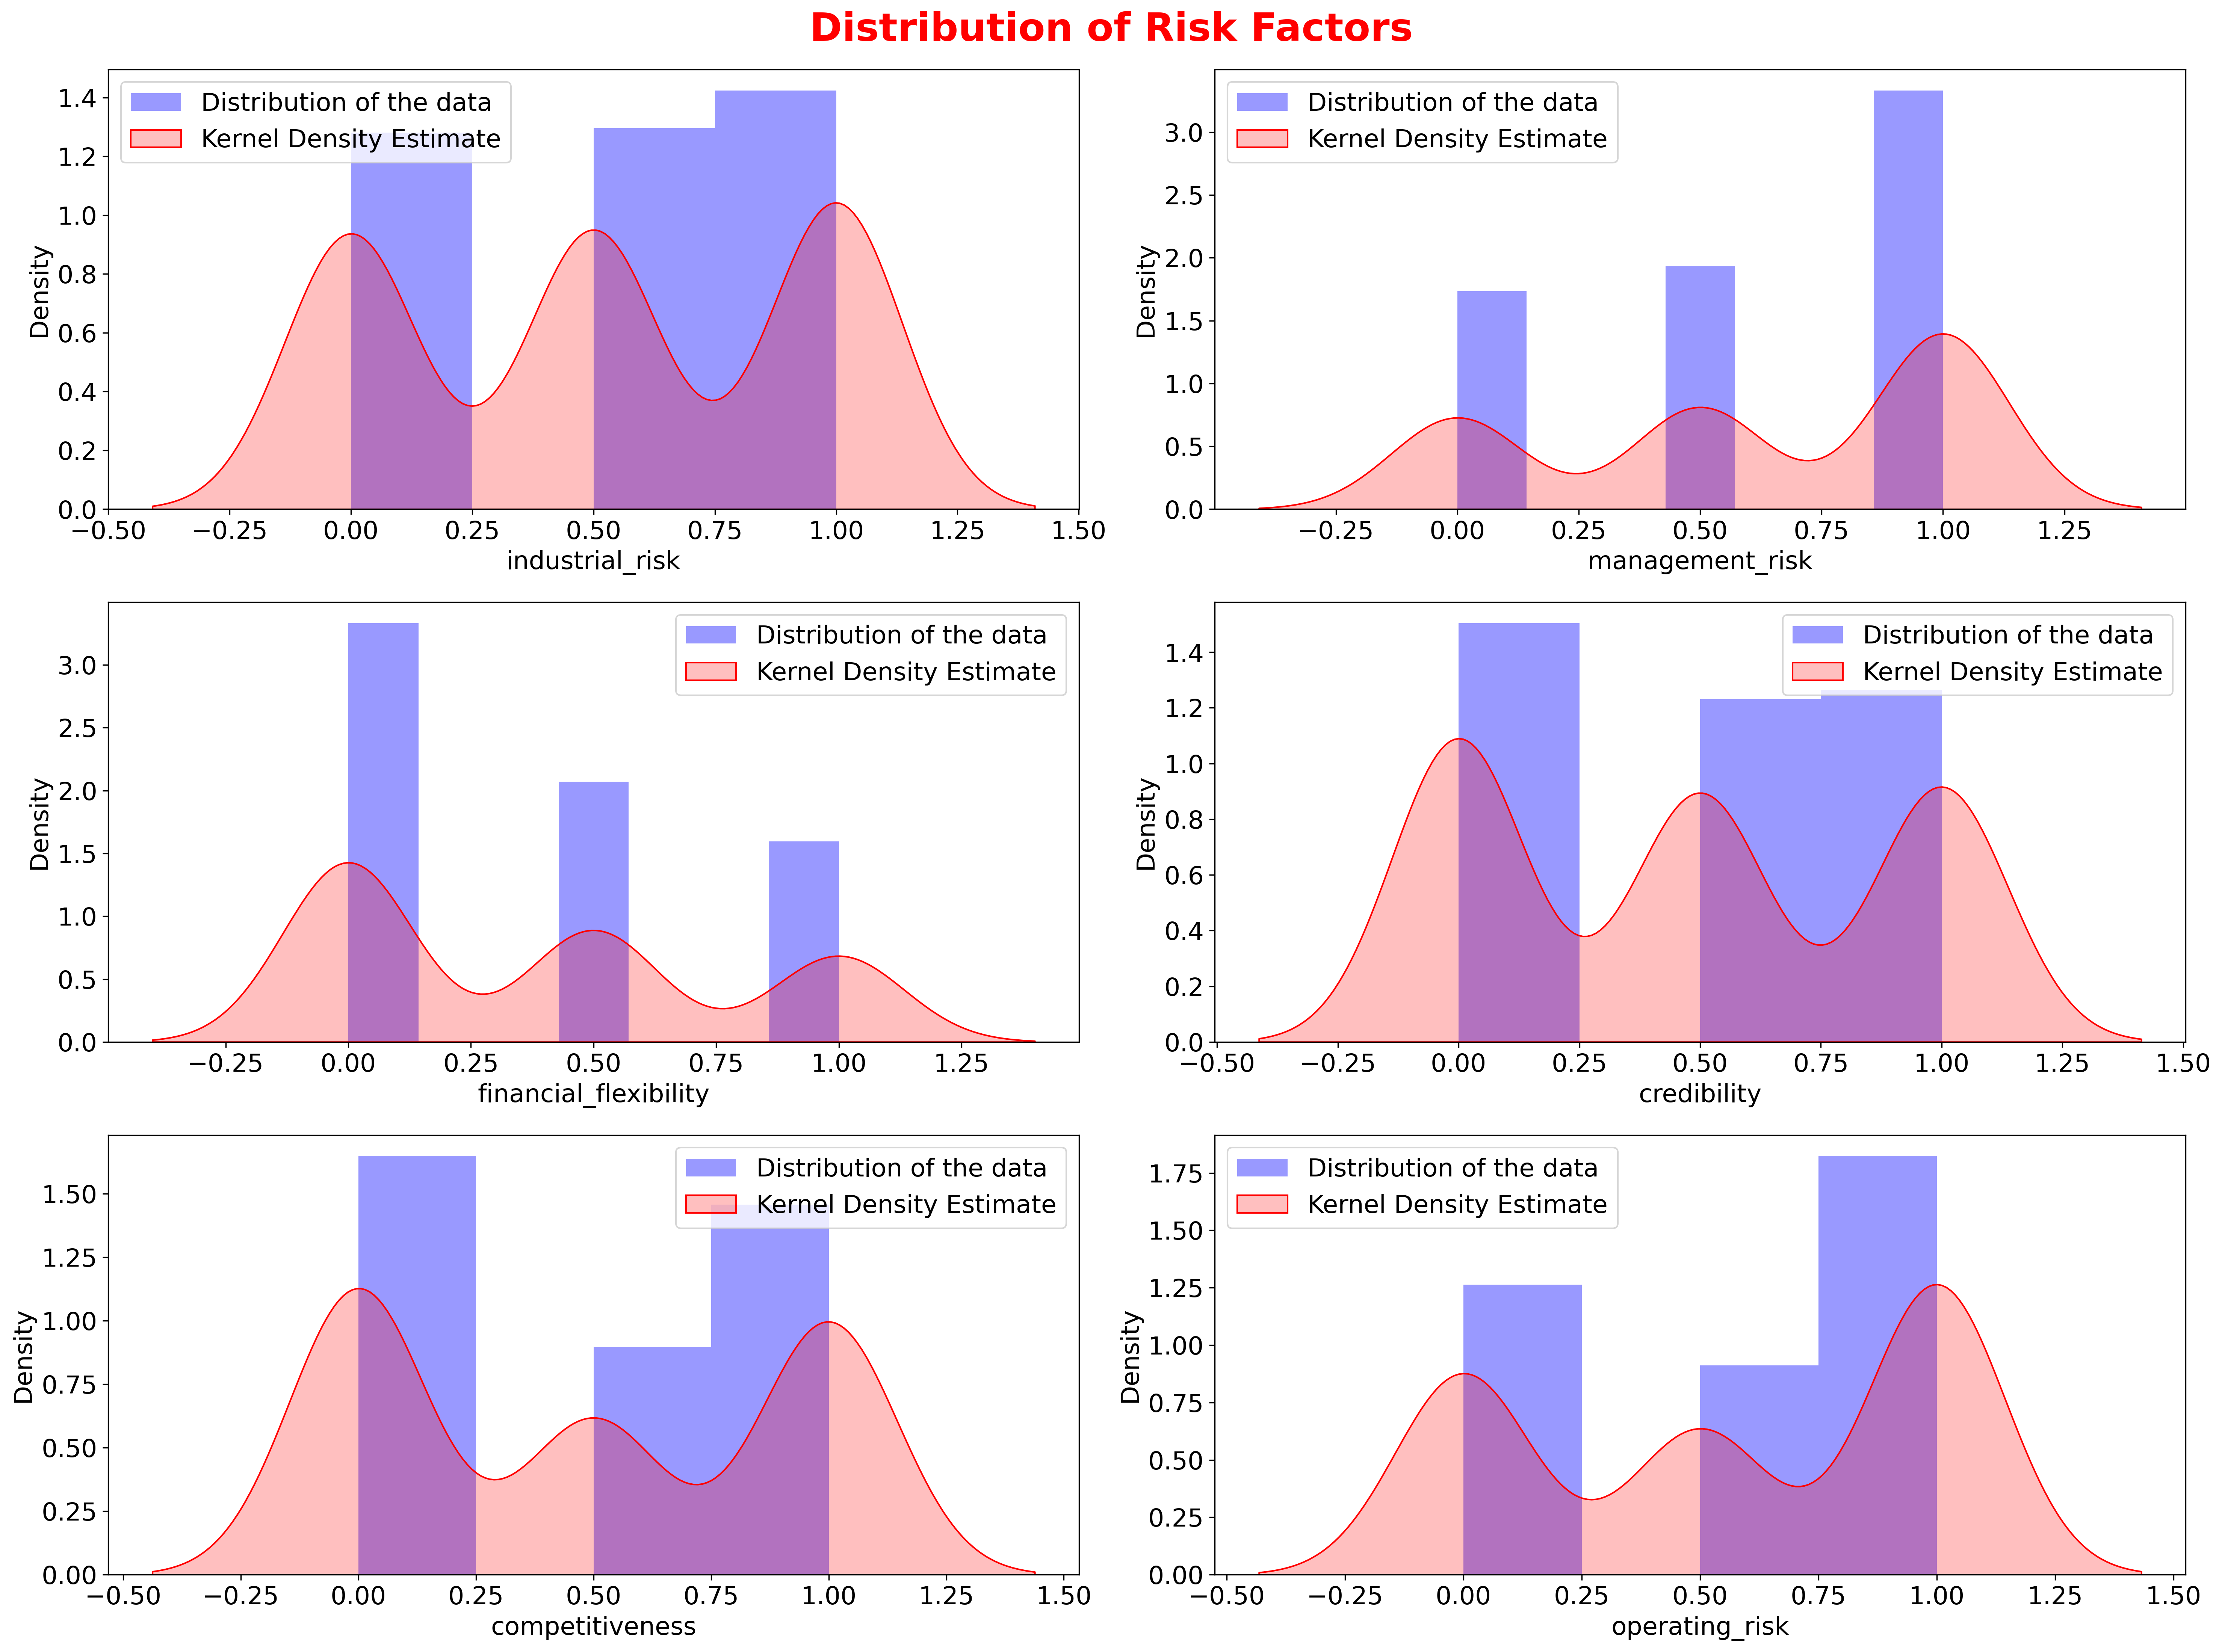

In [9]:
#Distribution plot for each column

fig, ax = plt.subplots(nrows=3, ncols=2)
fig.suptitle('Distribution of Risk Factors', fontsize = 25, fontweight = 'bold', color = 'red')

risk = company.iloc[:,:6]
for i, factor in enumerate(risk):
    row=i//2 
    col=i%2 
    sns.distplot(company[factor],ax=ax[row,col],kde_kws={'fill':True,'color':'red','label':'Kernel Density Estimate'},color='blue',label='Distribution of the data')
    ax[row,col].legend() 

plt.tight_layout()

In [10]:
#Skewness

company.skew()

industrial_risk         -0.067011
management_risk         -0.444701
financial_flexibility    0.479134
credibility              0.112955
competitiveness          0.093906
operating_risk          -0.275547
dtype: float64

Inference: 

Mean of the Industrial risk, Management risk, Operating risk are greater than median, so it is negatively skewed.

Median of Financial flexibility, credibility, Competitveness are greater than mean, so it is positively skewed.

But overall all the features are near to normal distribution as the distribution of data is not greater than 1 or less than -1

In [11]:
company.groupby('class').count()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
class,,,,,,
bankruptcy,107,107,107,107,107,107
non-bankruptcy,143,143,143,143,143,143


ValueError: cannot convert float NaN to integer

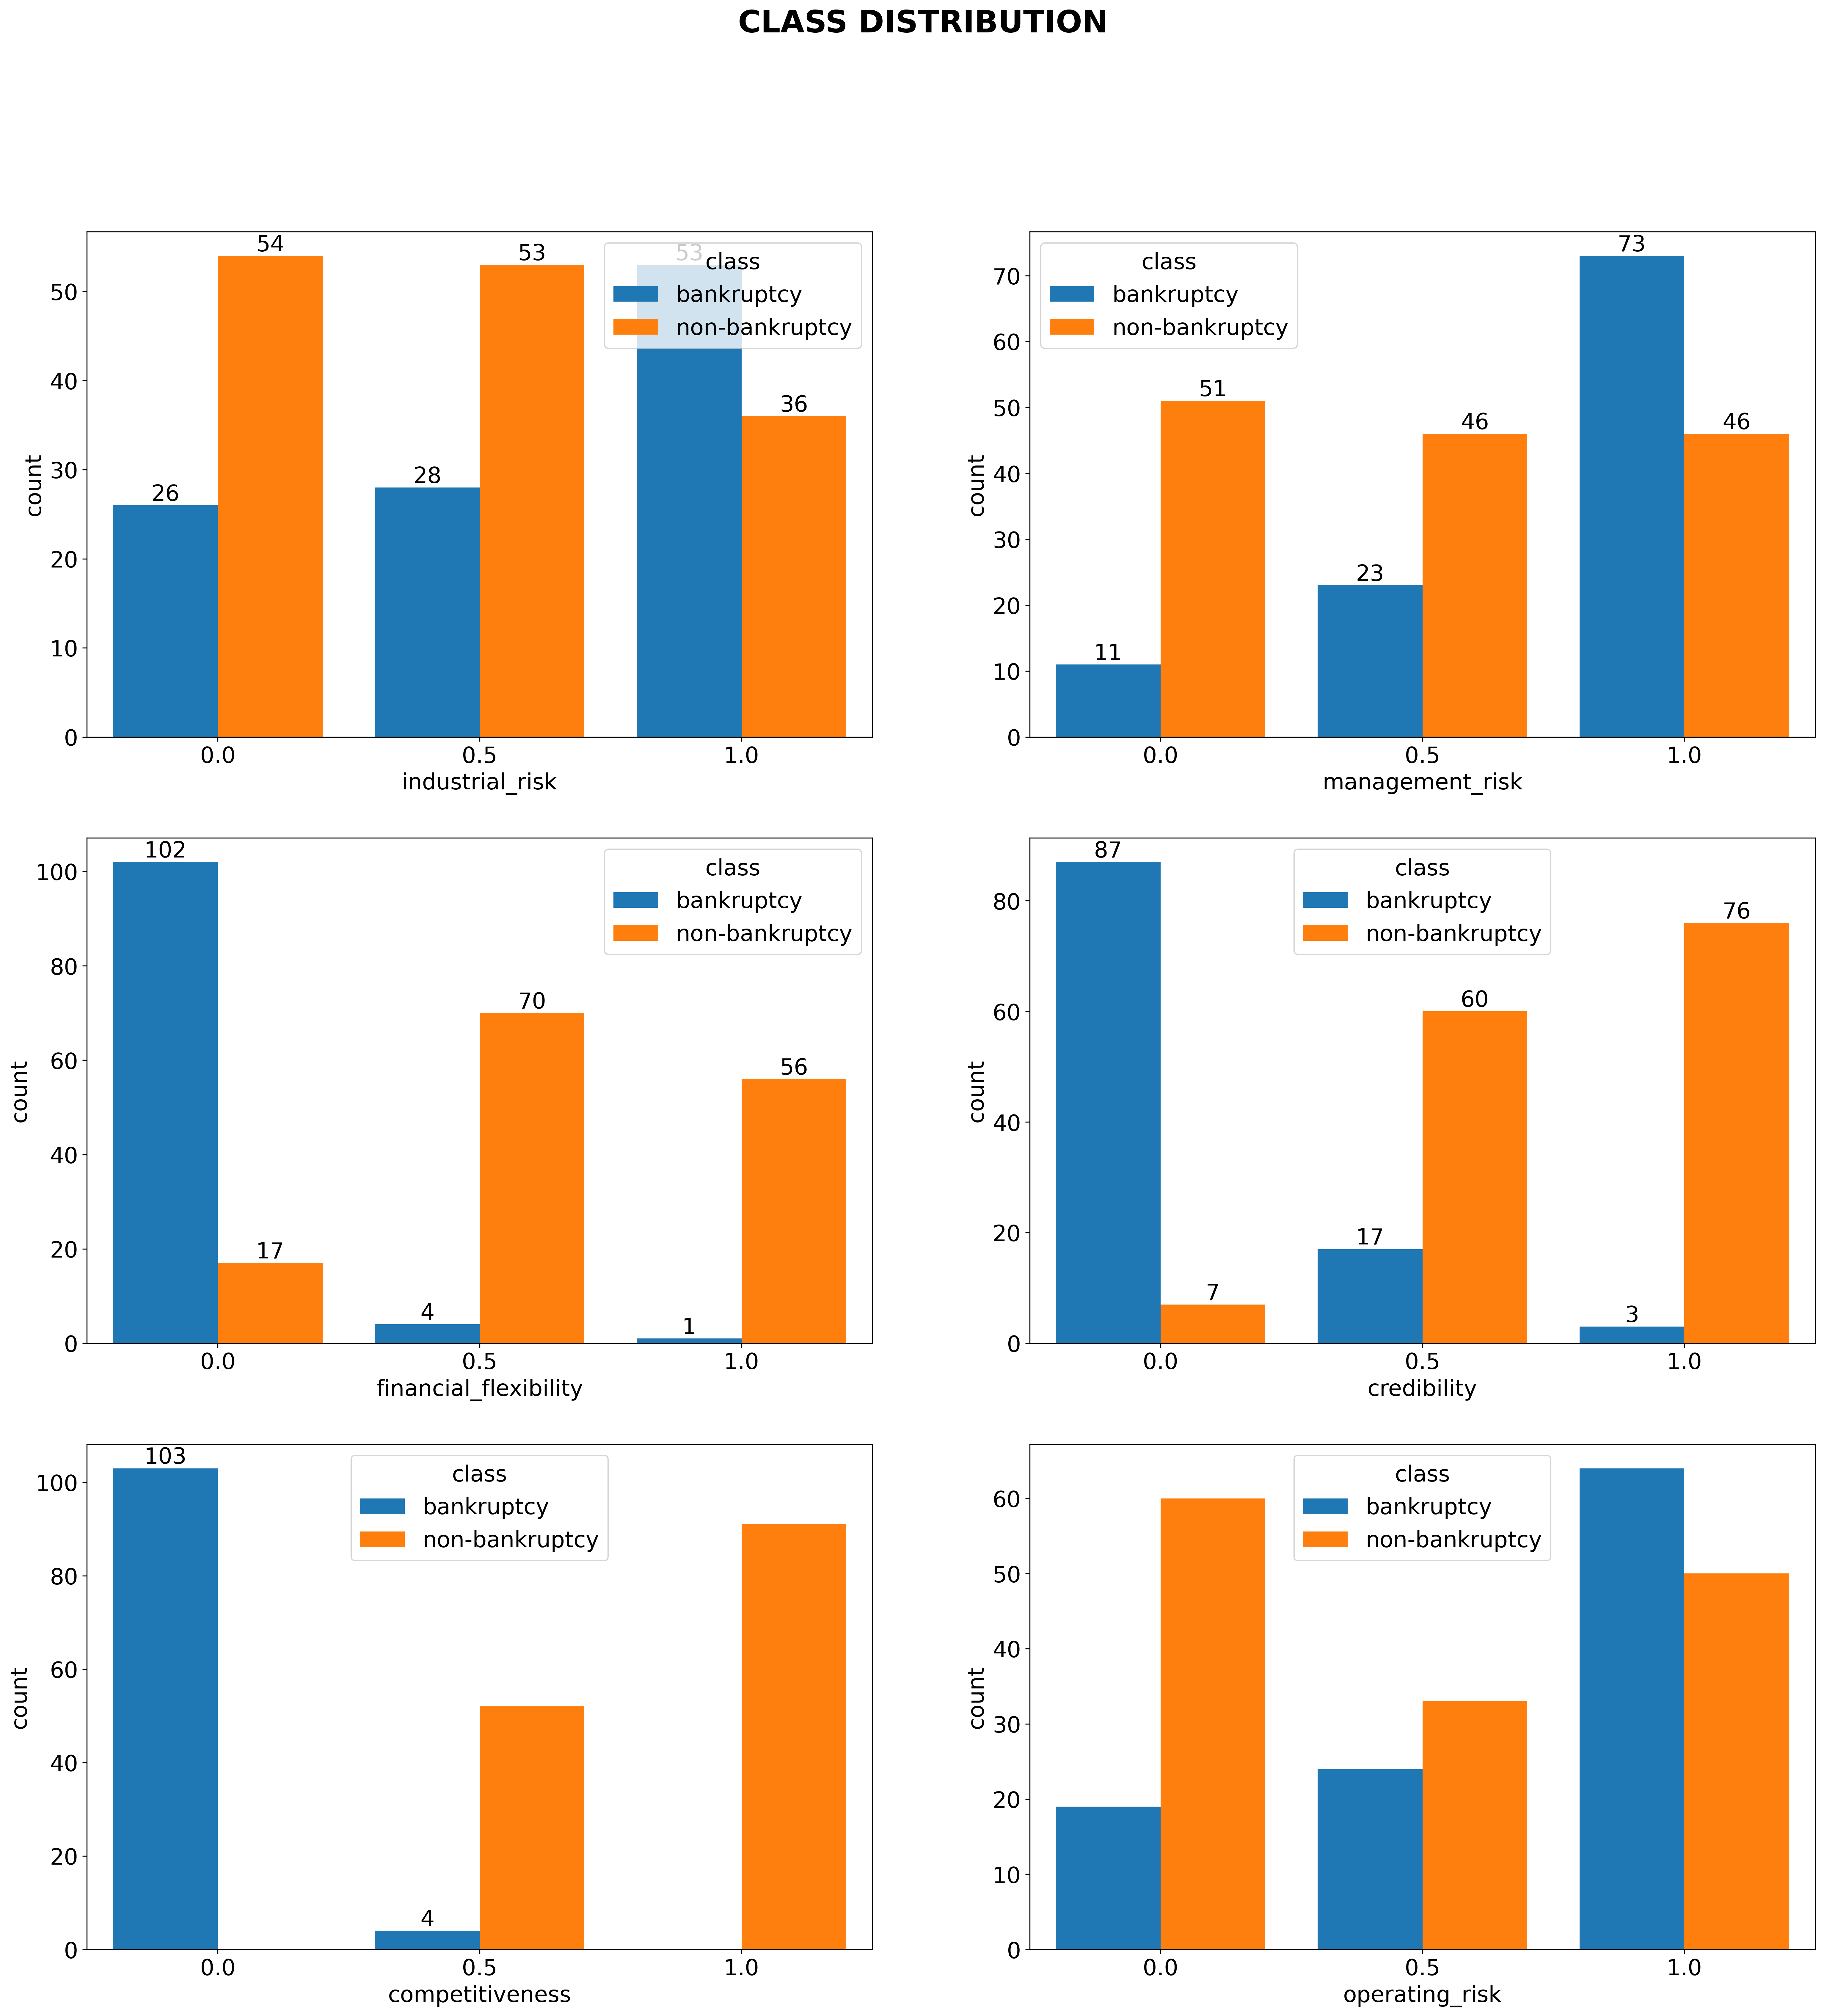

In [12]:
plt.rcParams['figure.figsize'] = (25,20)
plt.rcParams['font.size'] = 18

#Individual feature Analysis for class using Count plt

fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(25,25))   
fig.suptitle('CLASS DISTRIBUTION',fontsize=25,fontweight='bold',color='black')

risk_factors = company.iloc[:,:6]
for i,risk_factors in enumerate(risk_factors):
    row=i//2 
    col=i%2 
    sns.countplot(x=risk_factors,data=company,hue='class',saturation=1.3,ax=ax[row,col])
for k in range(3):
    for j in range(2):
        for p in ax[k,j].patches:
            ax[k,j].text(p.get_x()+p.get_width()/2,p.get_height(),'%d'%int(p.get_height()),ha='center',va='bottom') 
plt.tight_layout()                                                                                                

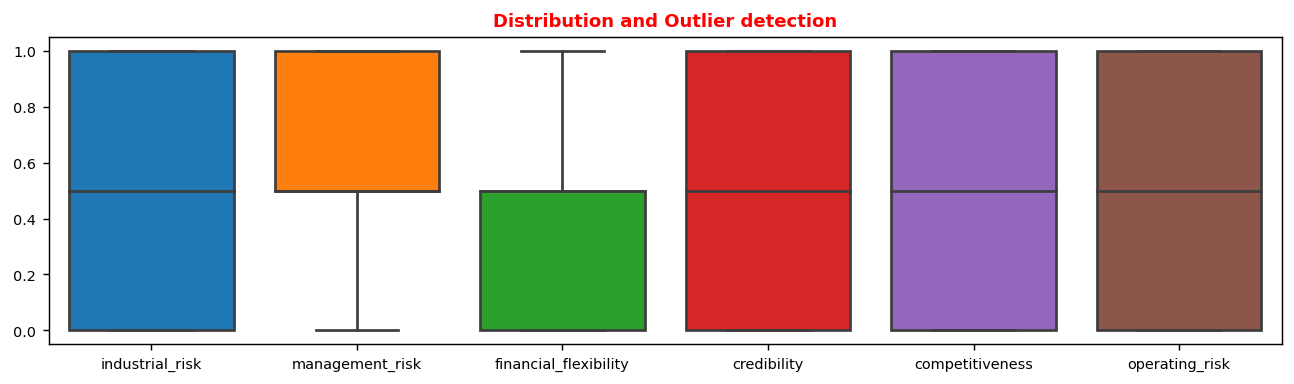

In [13]:
#Boxplot for the distribution of the data and outlier detection

plt.rcParams['figure.figsize'] = (10,3)
plt.rcParams['figure.dpi'] = 130
plt.rcParams['font.size'] = 8
plt.title('Distribution and Outlier detection', fontsize = 10, fontweight = 'bold', color = 'red')
sns.boxplot(data=company, saturation=1.2)
plt.tight_layout()

ValueError: cannot convert float NaN to integer

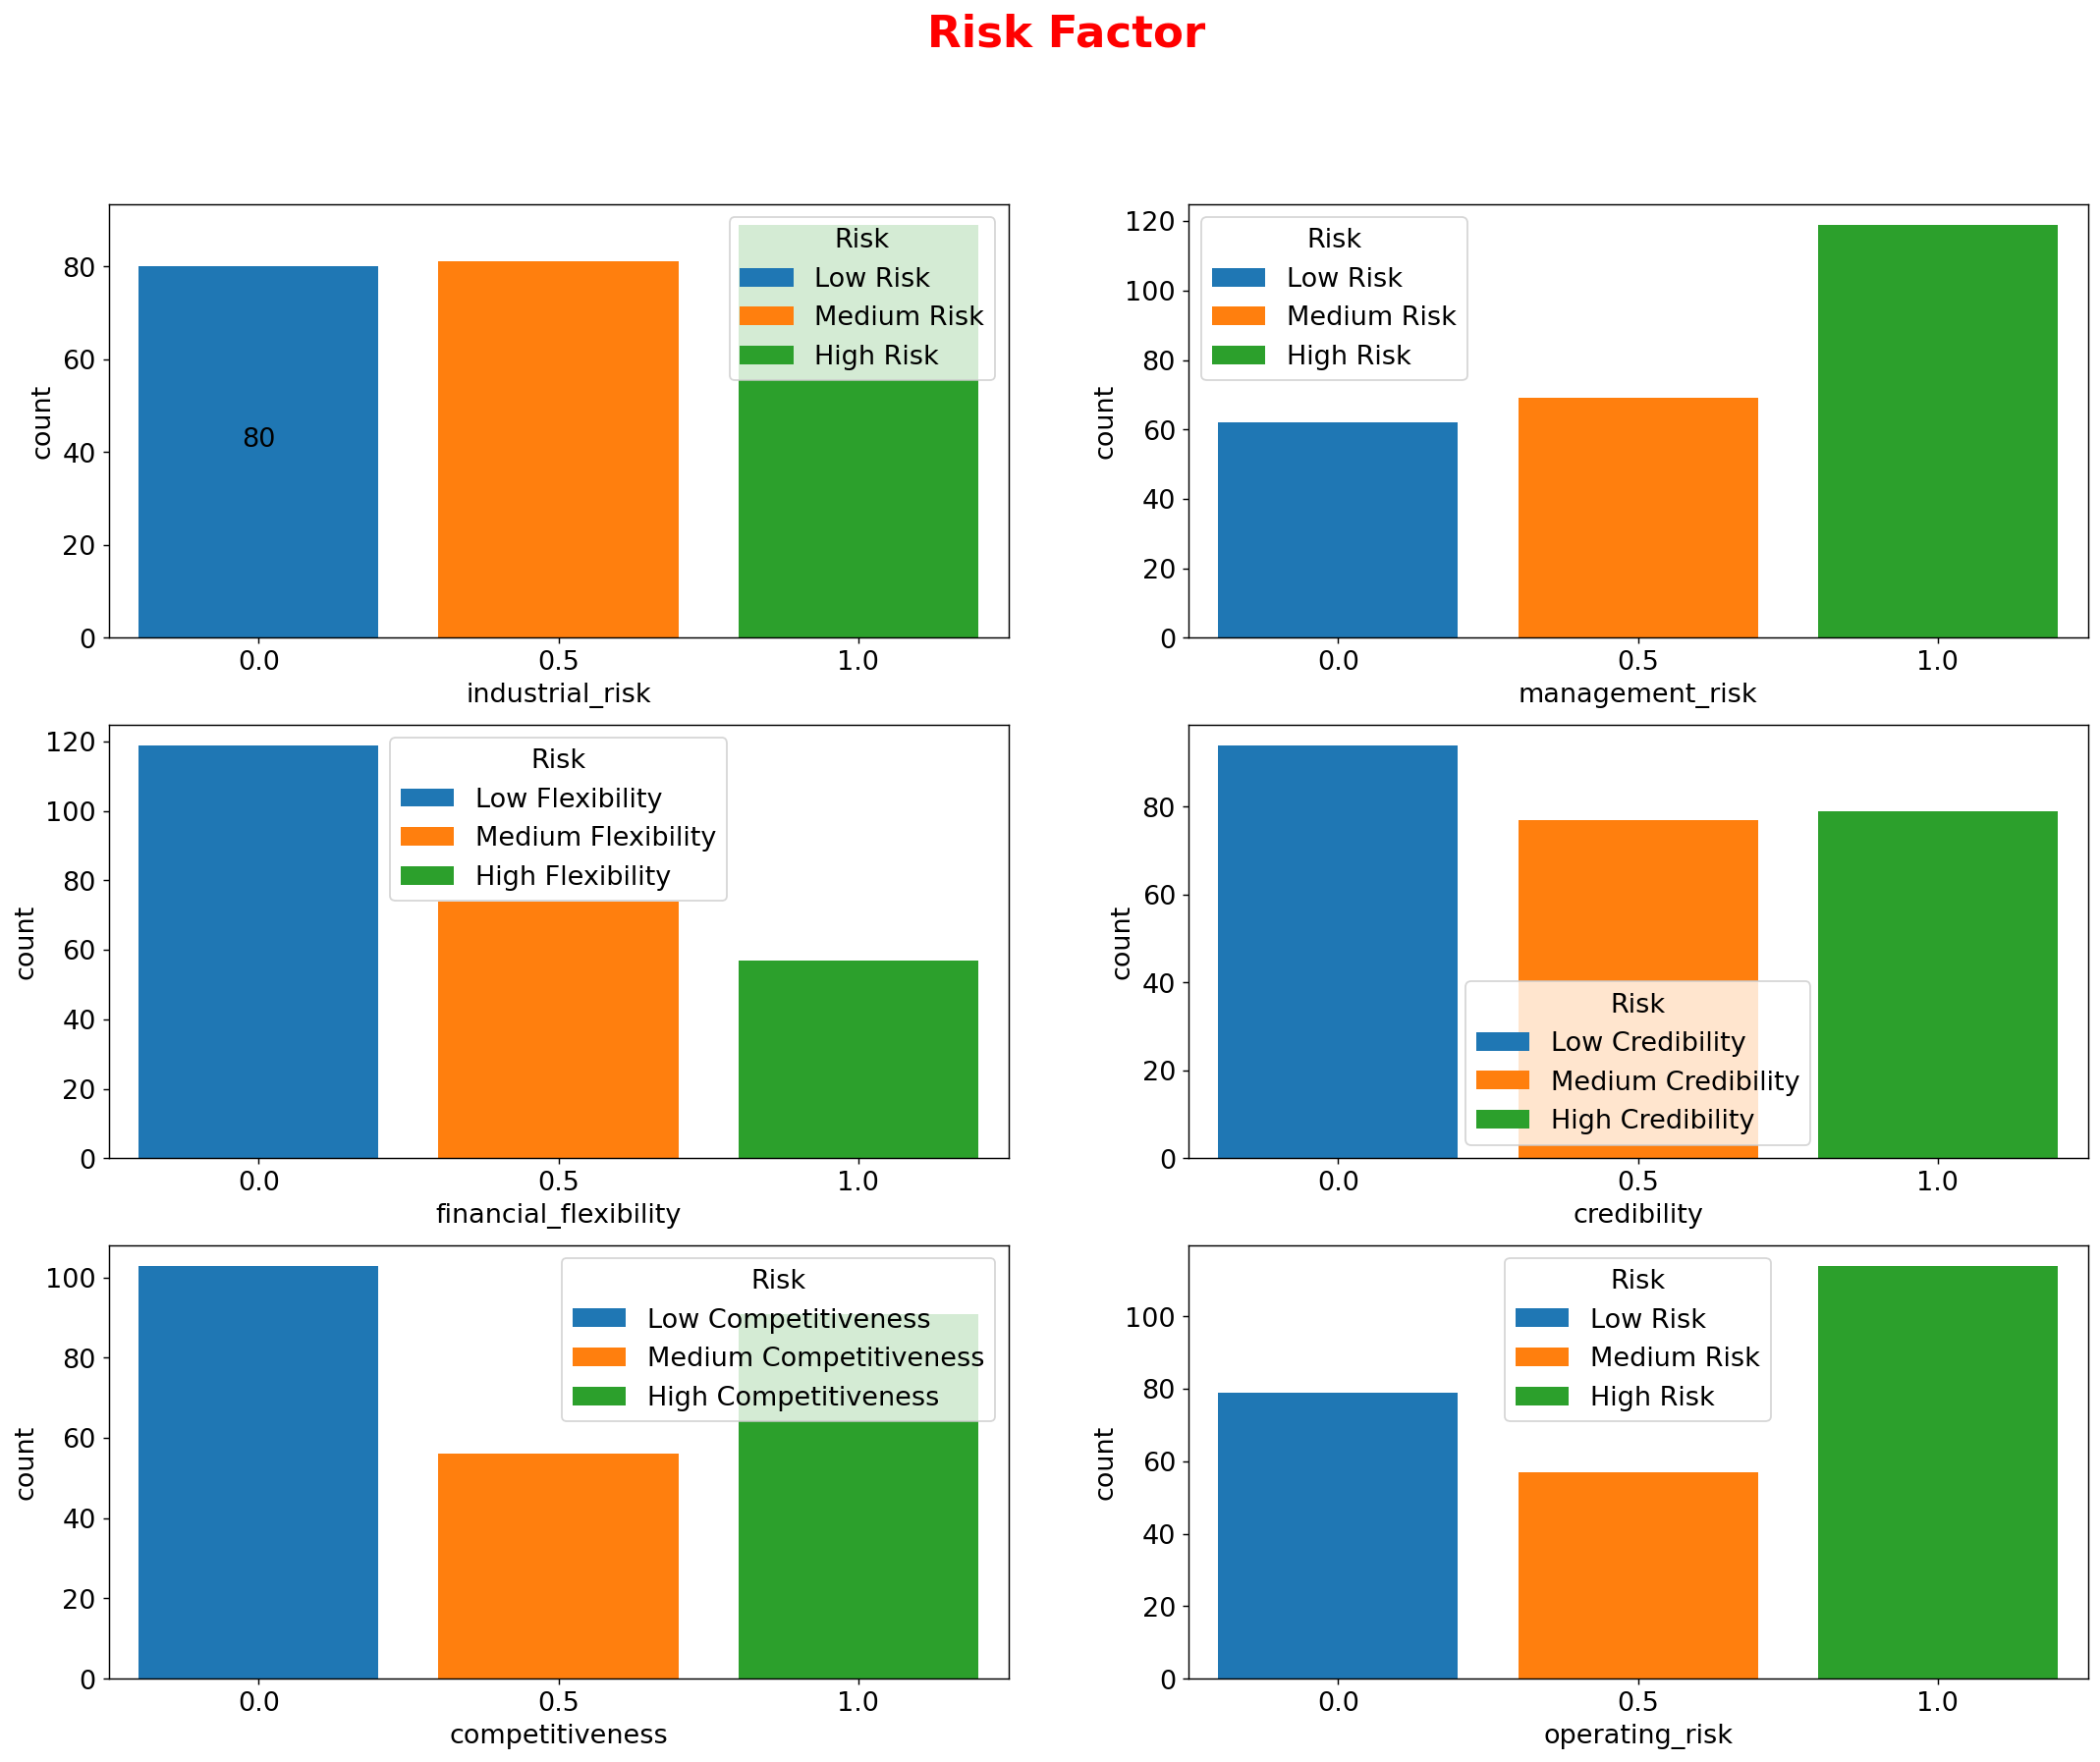

In [14]:
#Risk factor for each features

plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(3,2, figsize = (20,15))
fig.suptitle('Risk Factor', fontsize = 25, fontweight = 'bold', color = 'red')
sns.countplot(x = 'industrial_risk',data = company, hue= 'industrial_risk',saturation=1.2,ax=ax[0,0], dodge= False)
ax[0,0].legend(title = 'Risk',labels=['Low Risk','Medium Risk', 'High Risk'])
sns.countplot(x = 'management_risk',data = company,hue= 'management_risk',saturation=1.2,ax=ax[0,1], dodge= False)
ax[0,1].legend(title = 'Risk',labels=['Low Risk','Medium Risk', 'High Risk'])
sns.countplot(x = 'financial_flexibility',data = company,hue= 'financial_flexibility',saturation=1.2,ax=ax[1,0], dodge= False)
ax[1,0].legend(title = 'Risk',labels=['Low Flexibility','Medium Flexibility', 'High Flexibility'])
sns.countplot(x = 'credibility',data = company,hue= 'credibility',saturation=1.2,ax=ax[1,1], dodge= False)
ax[1,1].legend(title = 'Risk',labels=['Low Credibility','Medium Credibility', 'High Credibility'])
sns.countplot(x = 'competitiveness',data = company,hue= 'competitiveness',saturation=1.2,ax=ax[2,0], dodge= False)
ax[2,0].legend(title = 'Risk',labels=['Low Competitiveness','Medium Competitiveness', 'High Competitiveness'])
sns.countplot(x = 'operating_risk',data = company,hue= 'operating_risk',saturation=1.2,ax=ax[2,1], dodge= False)
ax[2,1].legend(title = 'Risk', labels=['Low Risk','Medium Risk', 'High Risk'])

for i in range(3):
    for j in range(2):
        for p in ax[i, j].patches:
            ax[i, j].text(p.get_x() + p.get_width() / 2, p.get_height() / 2, int(p.get_height()),ha='center', va='bottom')

plt.tight_layout()

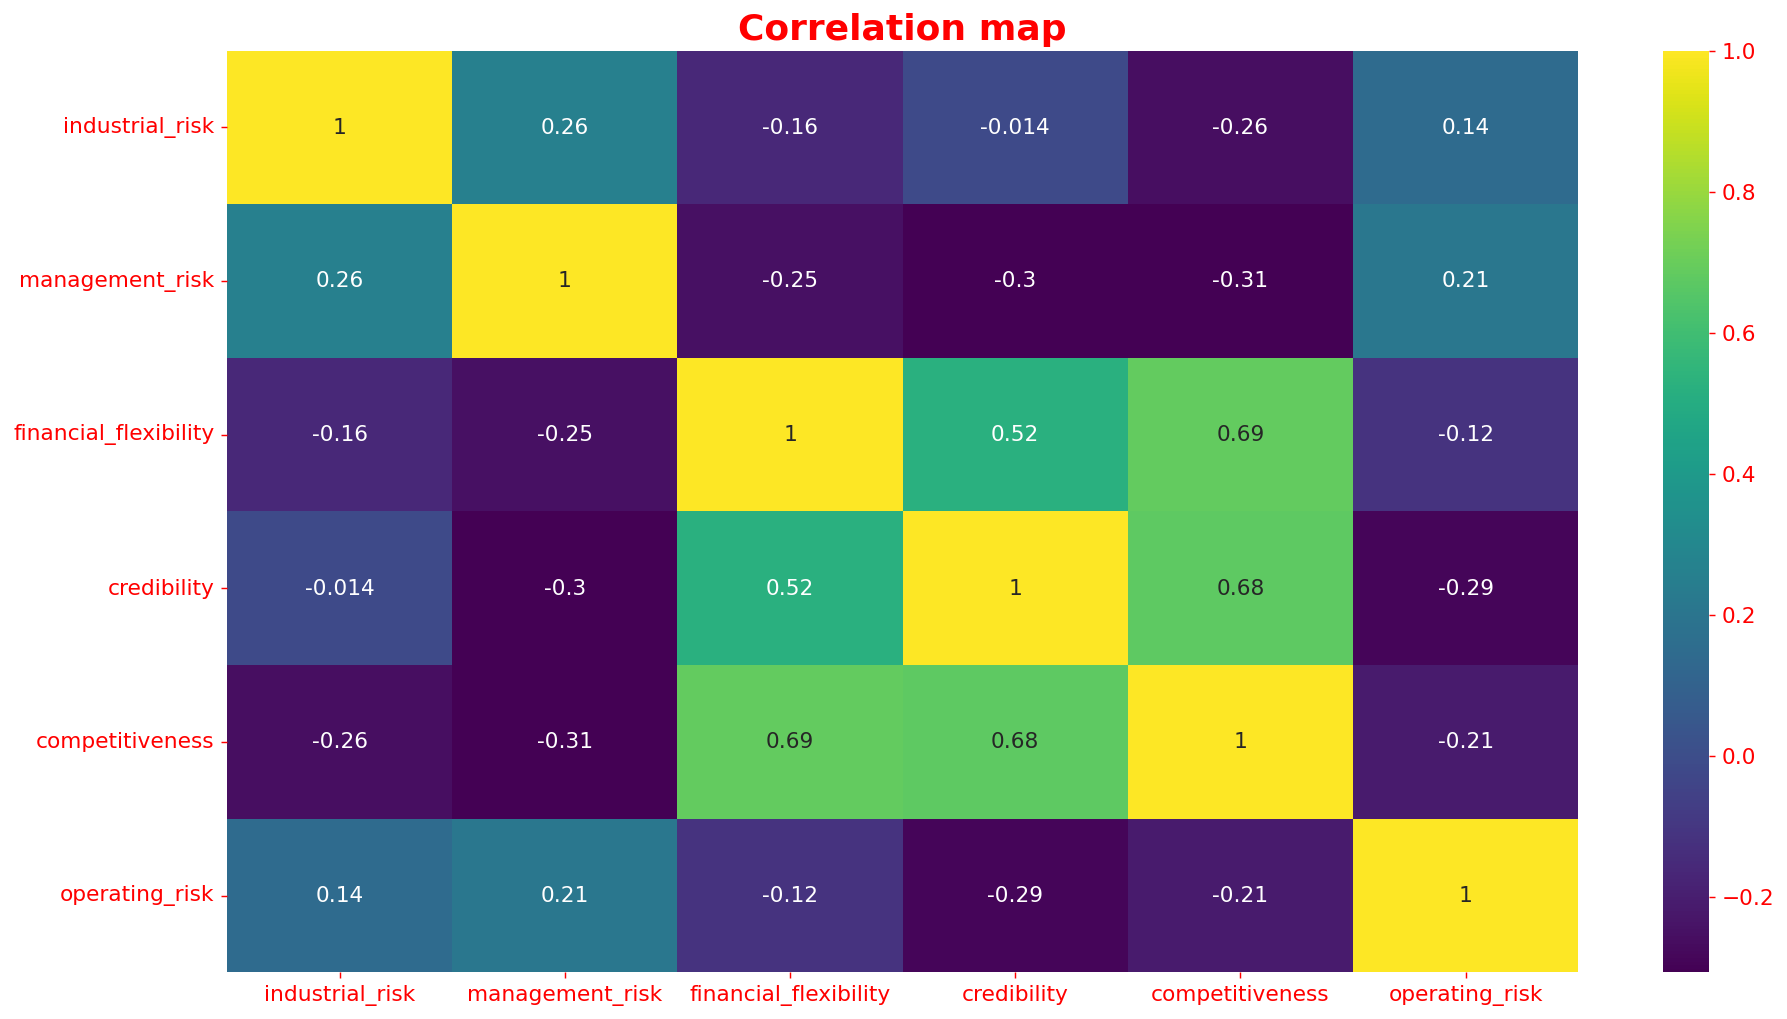

In [16]:
#Correlation between the features

plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['font.size'] = 12
plt.rcParams['xtick.color'] = 'red'
plt.rcParams['ytick.color'] = 'red'
sns.heatmap(company.corr(),annot=True, cmap = 'viridis')
plt.title('Correlation map', color = 'red', fontsize = 20, fontweight = 'bold')
plt.tight_layout()

In [17]:
#Defining independent features(X) and dependent feature or target variable(y)

X = company.iloc[:,:6]
y = company['class']

In [18]:
X

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0,0.0
247,0.0,1.0,1.0,0.5,0.5,0.0
248,1.0,0.0,0.5,1.0,0.5,0.0


In [19]:
y

0          bankruptcy
1          bankruptcy
2          bankruptcy
3          bankruptcy
4          bankruptcy
            ...      
245    non-bankruptcy
246    non-bankruptcy
247    non-bankruptcy
248    non-bankruptcy
249    non-bankruptcy
Name: class, Length: 250, dtype: object

# spliting data for model fitness check

In [20]:
#import library

from sklearn.model_selection import train_test_split

In [21]:
#Splitting the data into training and testing

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.80, random_state= 1)

In [22]:
Xtrain

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
228,1.0,1.0,1.0,0.5,0.5,1.0
85,0.5,0.5,0.0,0.0,0.0,1.0
112,0.5,0.5,1.0,1.0,1.0,0.5
148,1.0,0.5,1.0,1.0,1.0,1.0
171,0.0,1.0,0.0,1.0,1.0,0.5
...,...,...,...,...,...,...
137,0.0,1.0,1.0,1.0,1.0,1.0
72,1.0,0.5,1.0,0.5,0.0,0.0
140,1.0,0.0,0.5,1.0,0.5,0.0
235,0.5,0.5,1.0,0.5,0.5,0.5


In [23]:
Xtest.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
67,1.0,1.0,0.0,0.5,0.0,1.0
249,1.0,0.0,0.5,0.5,1.0,1.0
230,1.0,1.0,0.5,1.0,0.5,1.0
161,0.5,0.5,0.0,1.0,1.0,0.5
91,1.0,0.5,0.0,0.0,0.0,1.0


In [24]:
ytrain

228    non-bankruptcy
85         bankruptcy
112    non-bankruptcy
148    non-bankruptcy
171    non-bankruptcy
            ...      
137    non-bankruptcy
72         bankruptcy
140    non-bankruptcy
235    non-bankruptcy
37         bankruptcy
Name: class, Length: 200, dtype: object

In [25]:
ytest.head()

67         bankruptcy
249    non-bankruptcy
230    non-bankruptcy
161    non-bankruptcy
91         bankruptcy
Name: class, dtype: object

# 1. Model building using Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

In [27]:
#Encode the target variable

le = LabelEncoder()

ytest_enc = le.fit_transform(ytest)
ytest_enc

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0])

In [28]:
#create a logistic regression variable

lg = LogisticRegression()

In [29]:
#Fitting the model into training data

lg.fit(Xtrain, ytrain)

LogisticRegression()

In [30]:
#Predict the model

ypred = lg.predict(Xtest)
ypred

array(['bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'bankruptcy', 'non-bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'bankruptcy', 'bankruptcy',
       'bankruptcy', 'bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'bankruptcy', 'bankruptcy', 'bankruptcy'], dtype=object)

In [31]:
#Accuracy of the model

print(classification_report(ytest, ypred))

                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00        24
non-bankruptcy       1.00      1.00      1.00        26

      accuracy                           1.00        50
     macro avg       1.00      1.00      1.00        50
  weighted avg       1.00      1.00      1.00        50



Inference:
    
    The model predicted all the classes correctly

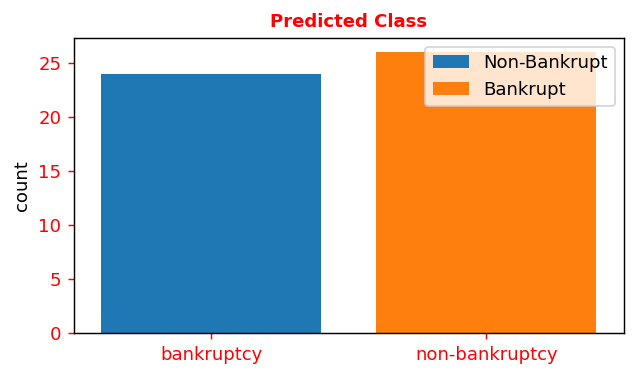

In [32]:
plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['font.size'] = 10

plt.title('Predicted Class', fontsize = 10, fontweight = 'bold', color = 'red')
sns.countplot(x = ypred,hue= ypred, saturation=1.2,dodge=False)
plt.legend(labels=['Non-Bankrupt','Bankrupt'])

plt.tight_layout()

In [33]:
confusion_matrix(ytest, ypred)

array([[24,  0],
       [ 0, 26]])

Inference:
    
    18 represents the number of True Positive and correctly classified into bankruptcy class
    0 represents the number of False Positive (no classes are incorrectly classified)
    0 represents the number of False Negative (no classes are incorrectly classified)
    32 represents the number of True Negative and correctly classified into non-bankruptcy class 

<AxesSubplot:title={'center':'Confusion Matrix'}>

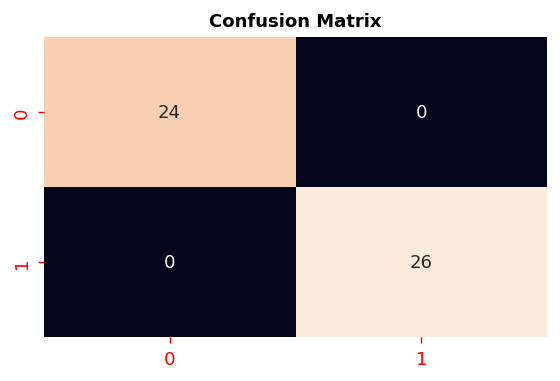

In [34]:
plt.title('Confusion Matrix', fontsize = 10, fontweight = 'bold')
sns.heatmap(confusion_matrix(ytest, ypred),annot= True, cbar= False)

In [35]:
proba = lg.predict_proba(Xtest)[:,1]

In [36]:
proba

array([0.0710126 , 0.96076666, 0.83272261, 0.96267645, 0.03662914,
       0.9863207 , 0.02993769, 0.98830127, 0.97884015, 0.02412327,
       0.75253605, 0.96187598, 0.9863207 , 0.9930579 , 0.93295868,
       0.03285863, 0.96187598, 0.02993769, 0.09948402, 0.04461258,
       0.99127228, 0.05525119, 0.19907613, 0.88509878, 0.84057871,
       0.96970461, 0.98034997, 0.98894768, 0.08711979, 0.61683259,
       0.99578345, 0.07490022, 0.04461258, 0.841383  , 0.94669874,
       0.83272261, 0.19118691, 0.02412327, 0.03285863, 0.92927192,
       0.99553504, 0.082291  , 0.04461258, 0.07490022, 0.04461258,
       0.99863254, 0.19907613, 0.04461258, 0.06701104, 0.04069074])

In [37]:
roc_curve(y_true=ytest_enc, y_score=proba)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.08333333,
        0.25      , 0.33333333, 0.45833333, 0.66666667, 0.75      ,
        1.        ]),
 array([0.        , 0.03846154, 0.26923077, 0.34615385, 0.5       ,
        0.57692308, 0.84615385, 0.92307692, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ]),
 array([1.99863254, 0.99863254, 0.98830127, 0.9863207 , 0.96267645,
        0.96187598, 0.84057871, 0.83272261, 0.61683259, 0.19907613,
        0.082291  , 0.07490022, 0.05525119, 0.04461258, 0.03662914,
        0.02412327]))

In [38]:
auc = roc_auc_score(y_true=ytest_enc,y_score= proba)

In [39]:
fpr, tpr ,threshold= roc_curve(y_true=ytest_enc, y_score=proba)

In [40]:
pd.DataFrame({'False Positive Rate': fpr,
             'True Positive Rate': tpr,
             'Threshold': threshold})

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,1.998633
1,0.000000,0.038462,0.998633
2,0.000000,0.269231,0.988301
3,0.000000,0.346154,0.986321
4,0.000000,0.500000,0.962676
5,0.000000,0.576923,0.961876
6,0.000000,0.846154,0.840579
7,0.000000,0.923077,0.832723
8,0.000000,1.000000,0.616833
9,0.083333,1.000000,0.199076


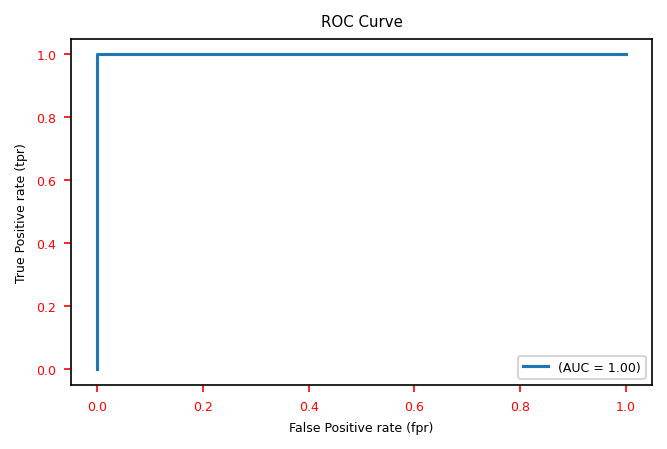

In [41]:
#ROC Curve

plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 6
plt.plot(fpr, tpr, label = '(AUC = %0.2f)' %auc)
plt.xlabel('False Positive rate (fpr)')
plt.ylabel('True Positive rate (tpr)')
plt.title('ROC Curve')
plt.legend()

# Model Building Using Decision Tree

In [42]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt = DecisionTreeClassifier(criterion= 'entropy')
dt

DecisionTreeClassifier(criterion='entropy')

In [48]:
dt.fit(Xtrain, ytrain)

ypred_dt = dt.predict(Xtest)

ypred_dt

array(['bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'bankruptcy', 'non-bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'bankruptcy', 'bankruptcy',
       'bankruptcy', 'bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'bankruptcy', 'bankruptcy', 'bankruptcy'], dtype=object)

In [50]:
print(classification_report(ytest, ypred_dt))

                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00        24
non-bankruptcy       1.00      1.00      1.00        26

      accuracy                           1.00        50
     macro avg       1.00      1.00      1.00        50
  weighted avg       1.00      1.00      1.00        50



In [51]:
print('Training Accuracy: ', dt.score(Xtrain, ytrain))
print('Testing Accuracy:  ', dt.score(Xtest, ytest))

Training Accuracy:  1.0
Testing Accuracy:   1.0


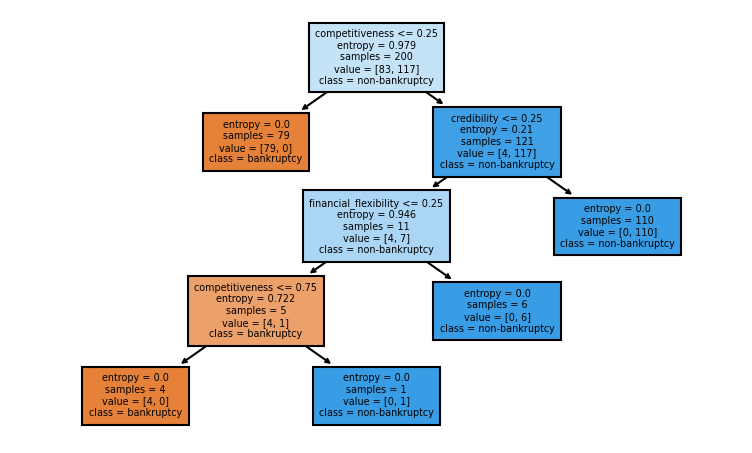

In [52]:
# Decision tree visualisation
tree.plot_tree(dt, feature_names= X.columns, class_names= company['class'].unique(), filled= True)
plt.tight_layout()
plt.show()

In [56]:
#Using Criterion Gini

dt_gini = DecisionTreeClassifier(criterion= 'gini')
dt_gini.fit(Xtrain, ytrain)
ypred_dtg = dt_gini.predict(Xtest)

In [57]:
print(classification_report(ytest, ypred_dtg))

                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00        24
non-bankruptcy       1.00      1.00      1.00        26

      accuracy                           1.00        50
     macro avg       1.00      1.00      1.00        50
  weighted avg       1.00      1.00      1.00        50



In [58]:
print('Training Accuracy: ', dt_gini.score(Xtrain, ytrain))
print('Testing Accuracy:  ', dt_gini.score(Xtest, ytest))

Training Accuracy:  1.0
Testing Accuracy:   1.0


In [60]:
pd.DataFrame({'Actual':ytest, 'Predicted': ypred_dtg})

,Actual,Predicted
67,bankruptcy,bankruptcy
249,non-bankruptcy,non-bankruptcy
230,non-bankruptcy,non-bankruptcy
161,non-bankruptcy,non-bankruptcy
91,bankruptcy,bankruptcy
224,non-bankruptcy,non-bankruptcy
58,bankruptcy,bankruptcy
234,non-bankruptcy,non-bankruptcy
180,non-bankruptcy,non-bankruptcy
4,bankruptcy,bankruptcy


# Model Building using KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV

In [65]:
knn=KNeighborsClassifier()

In [66]:
knn.fit(Xtrain,ytrain)

KNeighborsClassifier()

In [67]:
ypred_knn = knn.predict(Xtest)
ypred_knn

array(['bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'bankruptcy', 'non-bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'bankruptcy', 'bankruptcy',
       'bankruptcy', 'bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'bankruptcy', 'bankruptcy', 'bankruptcy'], dtype=object)

In [68]:
knn.score(Xtrain,ytrain),knn.score(Xtest,ytest)

(0.995, 1.0)

In [69]:
trainac = []
testac = []

for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain,ytrain)
    trainac.append(knn.score(Xtrain,ytrain))
    testac.append(knn.score(Xtest,ytest))

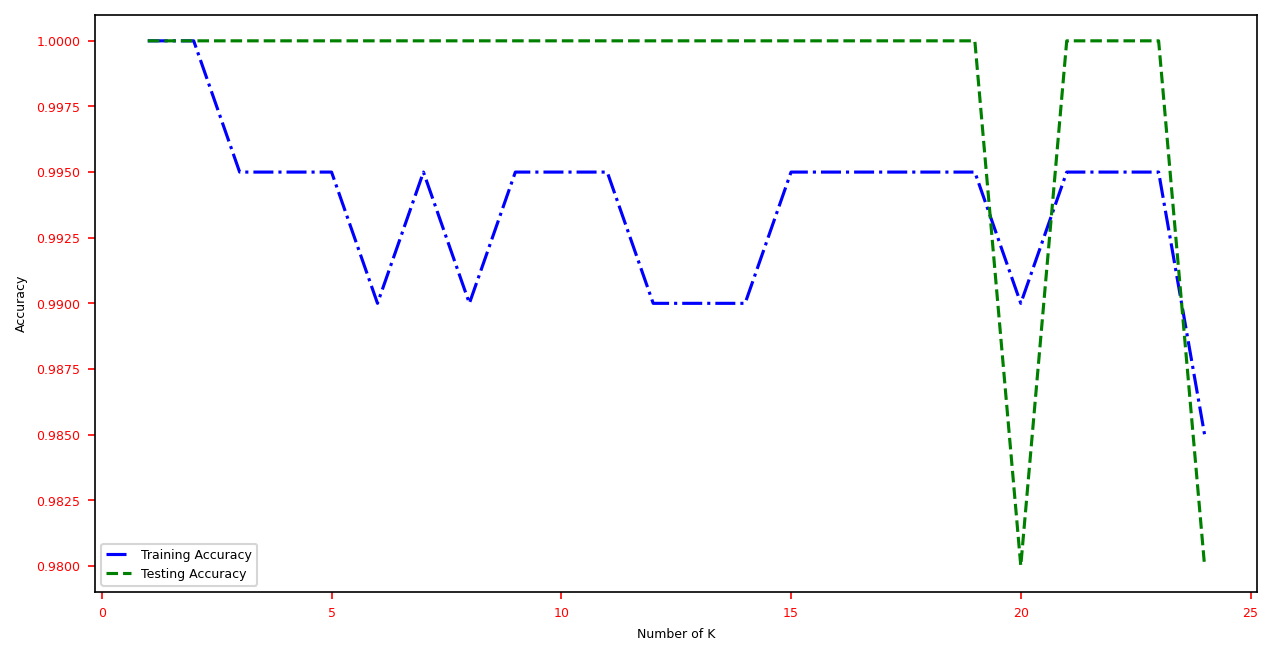

In [70]:
plt.rcParams['figure.figsize'] = (10,5)

plt.plot(range(1,25), trainac,linestyle = '-.', color = 'blue',label = 'Training Accuracy')
plt.plot(range(1,25),testac, linestyle = '--', color = 'green', label = 'Testing Accuracy')
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.legend()

In [71]:
n_neighbors = list(range(1,25))
parameters = {'n_neighbors' : n_neighbors}

In [72]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24]})

In [73]:
print(grid.best_score_)
print(grid.best_params_)

0.9960000000000001
{'n_neighbors': 1}


In [74]:
kfold = KFold(n_splits = 10)

In [75]:
k_range = range(1, 25)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv=kfold)
    k_scores.append(scores.mean())

In [76]:
k_scores

[0.9960000000000001,
 0.9960000000000001,
 0.9960000000000001,
 0.984,
 0.984,
 0.9800000000000001,
 0.9800000000000001,
 0.9800000000000001,
 0.9879999999999999,
 0.9879999999999999,
 0.9879999999999999,
 0.984,
 0.9879999999999999,
 0.984,
 0.984,
 0.9800000000000001,
 0.9879999999999999,
 0.976,
 0.9800000000000001,
 0.9760000000000002,
 0.9800000000000001,
 0.9760000000000002,
 0.9800000000000001,
 0.9760000000000002]

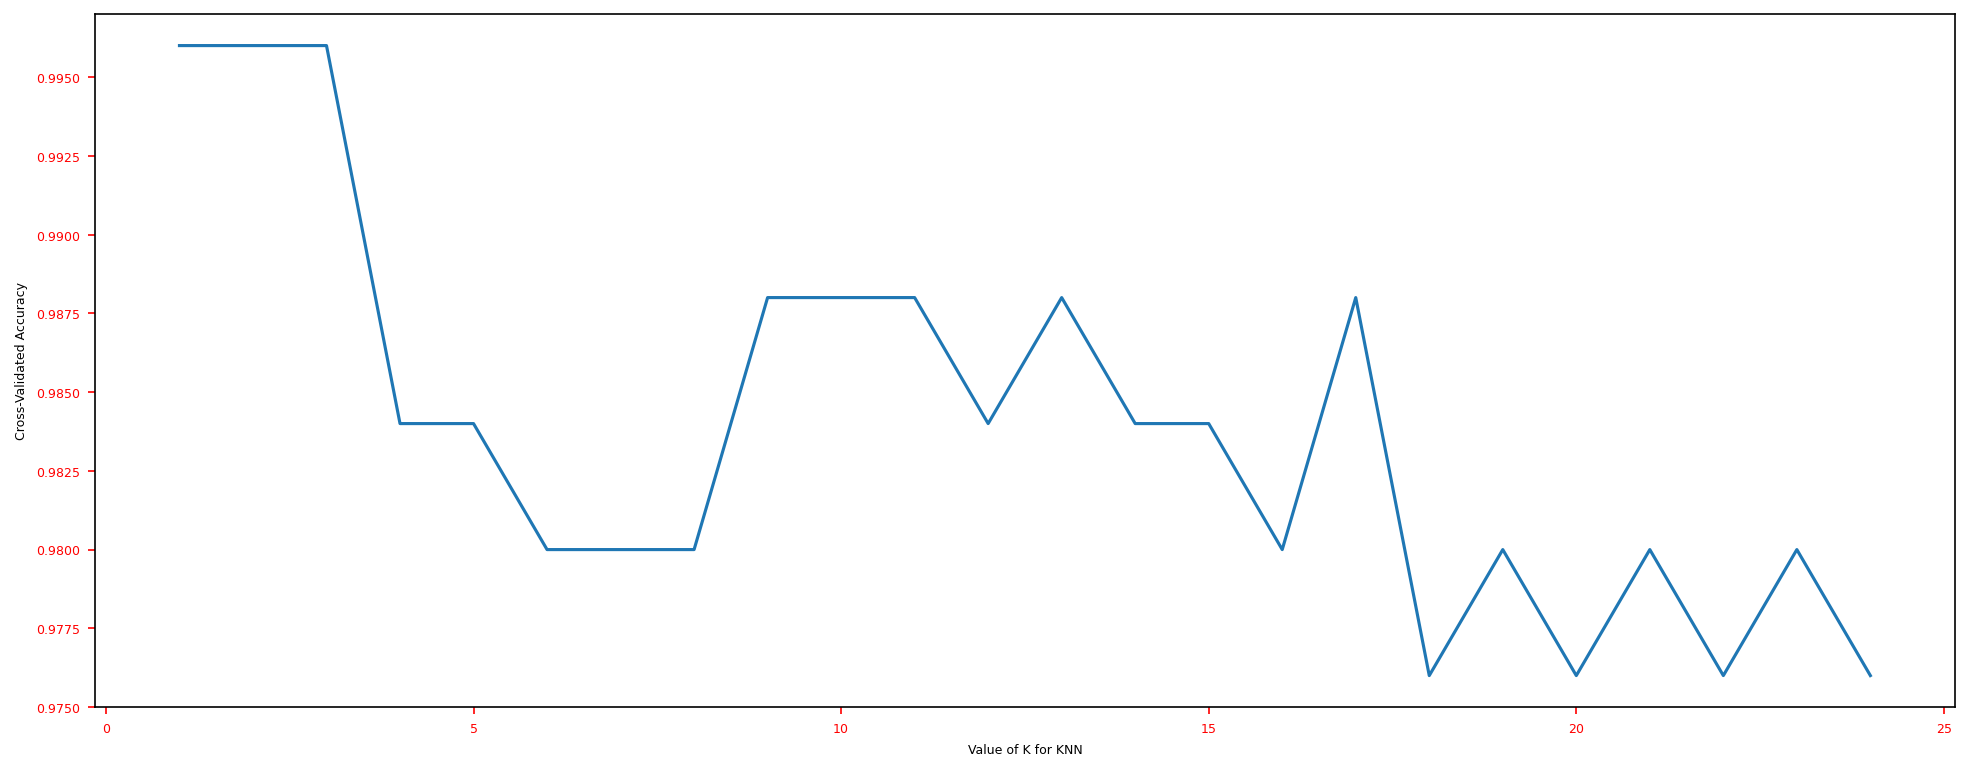

In [77]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [78]:
accuracy = pd.DataFrame({'Value of k' : range(1,25),
                            'Accuracy' : k_scores})
accuracy

,Value of k,Accuracy
0,1,0.996
1,2,0.996
2,3,0.996
3,4,0.984
4,5,0.984
5,6,0.980
6,7,0.980
7,8,0.980
8,9,0.988
9,10,0.988


# Model Building Using SVM 

In [79]:
from sklearn.svm import SVC

In [80]:
clf = SVC()

#kernel: 'poly', 'linear', 'sigmoid'
parameters = {'kernel':['rbf','sigmoid'],
               'gamma':[100, 50, 5, 0.5, 0.1, 0.01, 0.0001, 'auto'],
               'C':[50, 15, 10, 6, 5, 0.1, 0.001, 0.0001]}

gsv = GridSearchCV(clf, param_grid = parameters, cv = 10)

gsv.fit(Xtrain, ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [50, 15, 10, 6, 5, 0.1, 0.001, 0.0001],
                         'gamma': [100, 50, 5, 0.5, 0.1, 0.01, 0.0001, 'auto'],
                         'kernel': ['rbf', 'sigmoid']})

In [81]:
gsv.best_params_

{'C': 50, 'gamma': 0.5, 'kernel': 'rbf'}

In [82]:
gsv.best_score_

0.9949999999999999

In [83]:
rsv = RandomizedSearchCV(clf, param_distributions = parameters, cv=10, verbose = 3)
rsv.fit(Xtrain,ytrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ......C=5, gamma=auto, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/10] END ......C=5, gamma=auto, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/10] END ......C=5, gamma=auto, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/10] END ......C=5, gamma=auto, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/10] END ......C=5, gamma=auto, kernel=rbf;, score=1.000 total time=   0.0s
[CV 6/10] END ......C=5, gamma=auto, kernel=rbf;, score=1.000 total time=   0.0s
[CV 7/10] END ......C=5, gamma=auto, kernel=rbf;, score=1.000 total time=   0.0s
[CV 8/10] END ......C=5, gamma=auto, kernel=rbf;, score=1.000 total time=   0.0s
[CV 9/10] END ......C=5, gamma=auto, kernel=rbf;, score=1.000 total time=   0.0s
[CV 10/10] END .....C=5, gamma=auto, kernel=rbf;, score=0.950 total time=   0.0s
[CV 1/10] END .....C=6, gamma=5, kernel=sigmoid;, score=0.700 total time=   0.0s
[CV 2/10] END .....C=6, gamma=5, kernel=sigmoi

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [50, 15, 10, 6, 5, 0.1, 0.001,
                                              0.0001],
                                        'gamma': [100, 50, 5, 0.5, 0.1, 0.01,
                                                  0.0001, 'auto'],
                                        'kernel': ['rbf', 'sigmoid']},
                   verbose=3)

In [84]:
rsv.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'C': 5}

In [85]:
rsv.best_score_

0.9949999999999999

In [86]:
svc_model = SVC(C = 50, gamma = 0.01)
svc_model.fit(Xtrain , ytrain)

SVC(C=50, gamma=0.01)

In [87]:
ypred_svc = svc_model.predict(Xtest)
ypred_svc

array(['bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'bankruptcy', 'non-bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'bankruptcy', 'bankruptcy', 'non-bankruptcy', 'non-bankruptcy',
       'non-bankruptcy', 'bankruptcy', 'bankruptcy', 'bankruptcy',
       'non-bankruptcy', 'non-bankruptcy', 'bankruptcy', 'bankruptcy',
       'bankruptcy', 'bankruptcy', 'non-bankruptcy', 'bankruptcy',
       'bankruptcy', 'bankruptcy', 'bankruptcy'], dtype=object)

In [88]:
print(classification_report(ytest, ypred_svc))

                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00        24
non-bankruptcy       1.00      1.00      1.00        26

      accuracy                           1.00        50
     macro avg       1.00      1.00      1.00        50
  weighted avg       1.00      1.00      1.00        50




# Model Building Using Naive Bayes

In [89]:
from sklearn.naive_bayes import GaussianNB

In [90]:
# Create a Naive Bayes classifier object
nb = GaussianNB()

In [116]:
# Train the classifier on the training data
nb.fit(Xtrain, ytrain)

GaussianNB()

In [92]:
# Predict the class labels of the test data
y_pred_NB = nb.predict(Xtest)

In [112]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(ytest, y_pred_NB)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [113]:
# classification report for the Naive Bayes Model
print(classification_report(ytest, y_pred_NB))

                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00        24
non-bankruptcy       1.00      1.00      1.00        26

      accuracy                           1.00        50
     macro avg       1.00      1.00      1.00        50
  weighted avg       1.00      1.00      1.00        50



# Finding the best model using ensemble algorithm

In [94]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [104]:
# Create a Voting Classifier with Logistic Regression, Decision Tree and Support Vector Machine 
# and Naive Bayes
vc = VotingClassifier(estimators=[('lr', LogisticRegression()),
                                  ('dt',DecisionTreeClassifier()), 
                                  ('svm', SVC()),
                                  ('nb', GaussianNB())], voting='hard')

In [105]:
# Fit the model to the training data
vc.fit(Xtrain, ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()), ('svm', SVC()),
                             ('nb', GaussianNB())])

In [106]:
# Make predictions on the test data
vc_pred = vc.predict(Xtest)

In [107]:
# Calculate the accuracy of the Voting Classifier
vc_acc = accuracy_score(ytest, vc_pred)

print("Voting Classifier Accuracy:", vc_acc)

Voting Classifier Accuracy: 1.0


In [114]:
# Perform cross-validation on the voting classifier
scores = cross_val_score(vc, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [1.   1.   1.   0.98 1.  ]
Mean cross-validation score:  0.9960000000000001


# Deployment

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from sklearn import set_config

set_config(display='diagram')

In [ ]:
transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse=False, handle_unknown='ignore'),[6])],remainder='passthrough')

In [ ]:
transformer

In [ ]:
company.head(1)

In [ ]:
#Encode the target variable

lenc = LabelEncoder()

y_enc = lenc.fit_transform(y)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X, y_enc, test_size=0.2,random_state=1)

In [ ]:
dep_model = Pipeline(steps=[('model',GradientBoostingRegressor())])

In [ ]:
dep_model

In [ ]:
dep_model.fit(xtrain,ytrain)

In [ ]:
dep_model.fit(xtrain,ytrain)

In [ ]:
ypred_dep = dep_model.predict(xtest)

In [ ]:
ypred_dep

In [ ]:
import pickle
import streamlit as st

In [ ]:
pickle.dump(dep_model, open('depmodel.pkl','wb'))

In [ ]:
#loading the trained model
pickle_in = open('depmodel.pkl', 'rb')
dep_model = pickle.load(pickle_in)